In [1]:
import yfinance as yf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/letizialibrobuono/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data = yf.download('QQQ', start='2010-01-01', end='2023-01-08')
data["returns"] = data["Adj Close"].pct_change()

[*********************100%%**********************]  1 of 1 completed


In [3]:
Y_train = data["Close"].loc["2010-01-01":"2020-01-01"]
Y_test = data["Close"].loc["2020-01-01":"2023-01-08"]
X_train = np.arange(len(Y_train)).reshape(-1, 1)
X_test = np.arange(len(Y_train), len(Y_train) + len(Y_test)).reshape(-1, 1)

### Con Linear Regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly_train, Y_train)

modello = model.predict(X_poly_train)
Y_pred = model.predict(X_poly_test)



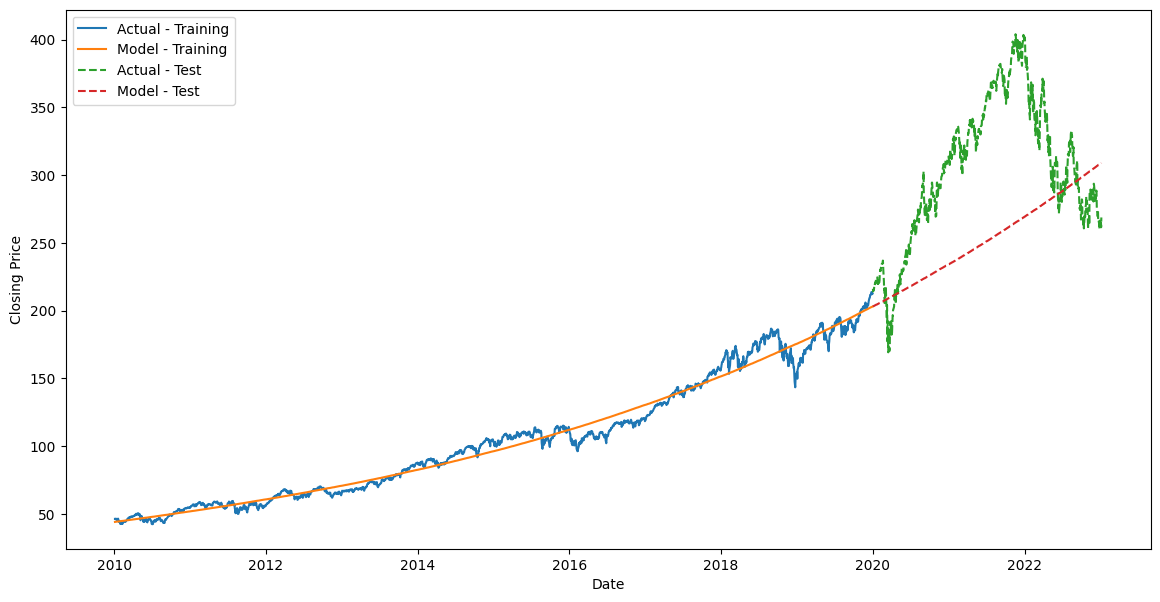

In [24]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(data.index[:len(Y_train)], Y_train, label='Actual - Training')
ax.plot(data.index[:len(Y_train)], modello, label='Model - Training')
ax.plot(data.index[len(Y_train):len(Y_train) + len(Y_test)], Y_test, label='Actual - Test', linestyle='--')
ax.plot(data.index[len(Y_train):len(Y_train) + len(Y_test)], Y_pred, label='Model - Test', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print(f'Mean Absolute Percentage Error: {mape}')

Mean Squared Error: 4956.146212952311
Mean Absolute Percentage Error: 0.1797580891919614


### Con Linear Regression + Lasso

In [96]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [97]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.001)
model.fit(X_poly_train, Y_train)

modello = model.predict(X_poly_train)
Y_pred = model.predict(X_poly_test)

/Users/letizialibrobuono/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.262e+04, tolerance: 5.256e+02
  model = cd_fast.enet_coordinate_descent(


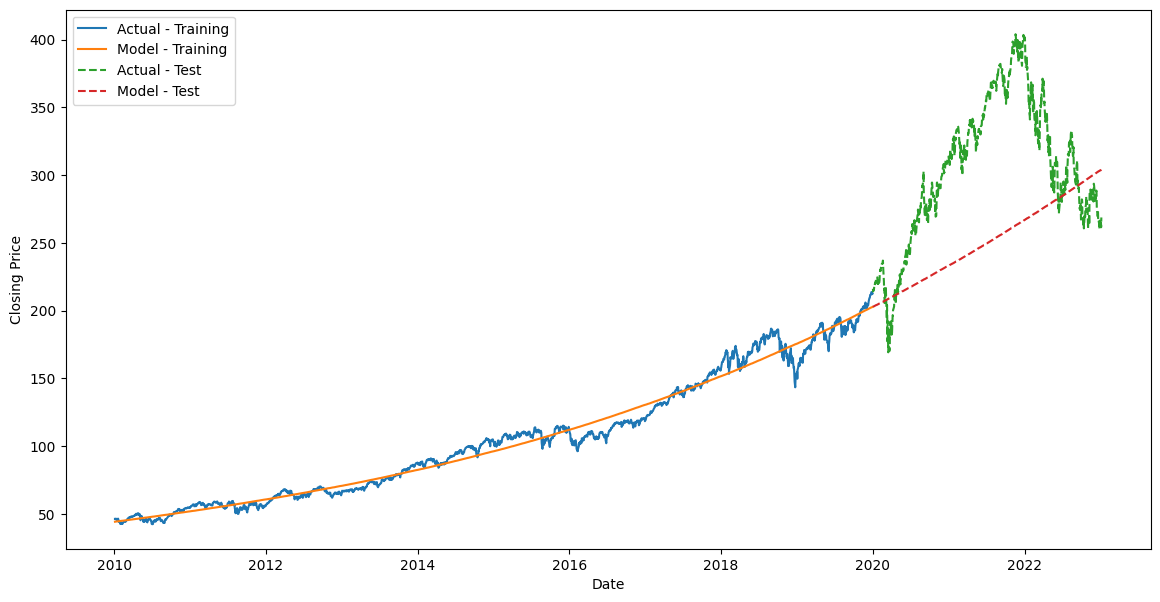

In [98]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(data.index[:len(Y_train)], Y_train, label='Actual - Training')
ax.plot(data.index[:len(Y_train)], modello, label='Model - Training')
ax.plot(data.index[len(Y_train):len(Y_train) + len(Y_test)], Y_test, label='Actual - Test', linestyle='--')
ax.plot(data.index[len(Y_train):len(Y_train) + len(Y_test)], Y_pred, label='Model - Test', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
plt.show()

In [99]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print(f'Mean Absolute Percentage Error: {mape}')

Mean Squared Error: 5120.401366395937
Mean Absolute Percentage Error: 0.18189439931557946


### Spline

In [84]:
from sklearn.preprocessing import SplineTransformer

spline = SplineTransformer(n_knots=10, degree=3)
X_spline_train = spline.fit_transform(X_train)  
X_spline_test = spline.transform(X_test)

In [85]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_spline_train, Y_train)

modello = model.predict(X_spline_train)
Y_pred = model.predict(X_spline_test)

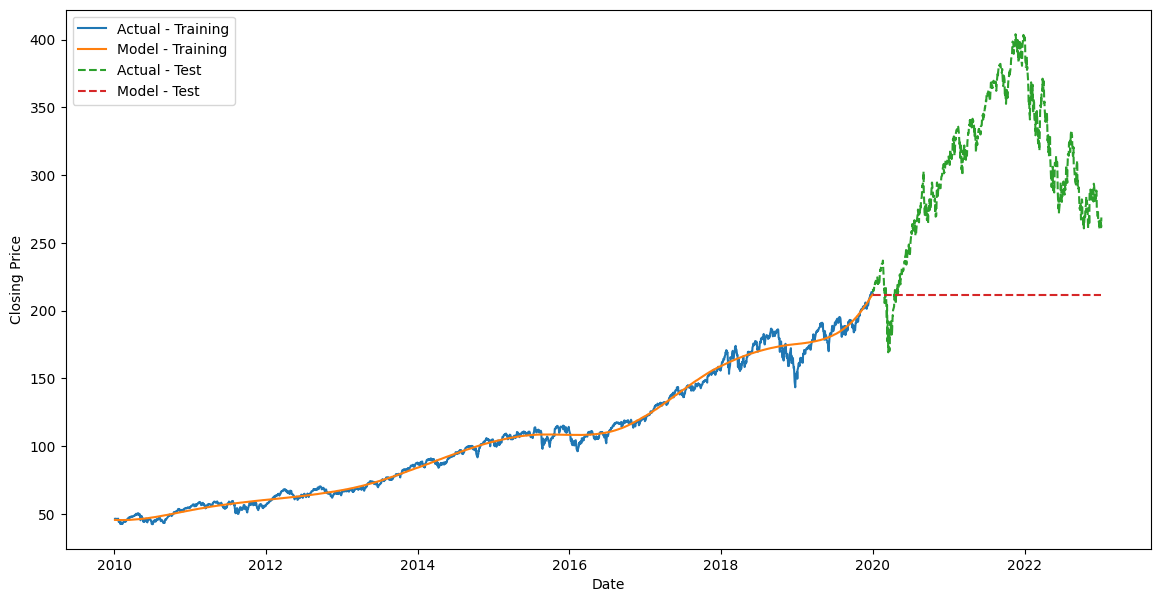

In [86]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(data.index[:len(Y_train)], Y_train, label='Actual - Training')
ax.plot(data.index[:len(Y_train)], modello, label='Model - Training')
ax.plot(data.index[len(Y_train):len(Y_train) + len(Y_test)], Y_test, label='Actual - Test', linestyle='--')
ax.plot(data.index[len(Y_train):len(Y_train) + len(Y_test)], Y_pred, label='Model - Test', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
plt.show()

In [87]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print(f'Mean Absolute Percentage Error: {mape}')

Mean Squared Error: 11418.162617760436
Mean Absolute Percentage Error: 0.2889747988301387
